<font size=7><p style="text-align: center;">Feature Importance</p></font>


### Contents<br>

1. [Introduction](#1)<br>
2. [Model Agnostic Methods](#2)<br>
    - [Spearman's Rank Correlation](#2a)<br>
        - [Regression Problem](#2aa)<br>
        - [Classification Problem](#2ab)<br>
    - [Pearson's Correlation](#2b)<br>
        - [Regression Problem](#2ba)<br>
        - [Classification Problem](#2bb)<br>
    - [Principal Component Analysis](#2c)<br>
        - [Regression Problem](#2ca)<br>
        - [Classification Problem](#2cb)<br>
    - [Permutation Importance](#2d)<br>
        - [Regression Problem (Linear Model)](#2da)<br>
        - [Classification Problem (Linear Model)](#2db)<br>
        - [Regression Problem (Tree based Model)](#2dc)<br>
        - [Classification Problem (Tree based Model)](#2dd)<br>
3. [Model Specific Methods](#3)<br>
    - [Linear Models](#3a)<br>
    - [Tree based Models](#3b)<br>
        - [Regression Problem](#3ba)<br>
        - [Classification Problem](#3bb)<br>
    - [Importance by Shapley value](#3c)<br>
        - [Regression Problem](#3ca)<br>
        - [Classification Problem](#3cb)<br>
4. [Comparison of feature importance techniques](#4)<br>
5. [Summary](#5)<br>
6. [References](#6)<br>


<a id="1"></a>
<font size=6><p style="text-align: center;">Introduction</p></font>
Feature importance is a way to measure how important one feature is compared to other features in dataset to perform predicitve modeling and do predictions. During modeling process it is important to have some interpretability or explainability, this helps in building better models. Feature importance is realtivistic measure and does not have any meaning in terms of their values independently but together for all features, they define magnituded of importance of one feature in relation the other features.
The feature importance are based on different criteria like contribution of feature in reducing error in the model, increasing the model's accuracy, or reducing the entropy or impurity in the data.

**Applications:**
1. Helps understand the behavior of a model by examining the feature importance scores, we can gain insights into which features are the most important for making predictions and how much each feature contributes to the accuracy of the model.
2. Feature importance scores can be used to select the most important features over less important ones. This can help to reduce the dimensionality of the data, improve the performance of the model, and reduce the risk of overfitting.
3. Feature importance scores can also help to identify which features are the most relevant for a particular data, this can also help engineering new features or transforming existing ones.

Feature Selection can be divided in majorly in two catefories:
1. Model Specific
2. Model Agnostic

<a id="2"></a>
<font size=6><p style="text-align: center;">Model Agnostic Methods</p></font>
These are the methods that work directly from the data is independent of the model used to fit the data.

<a id="2a"></a>
### 1. Spearman's Rank Correlation:
This method uses Spearman's rank correlation coefficient to identify the importance of feature. Spearman's rank correlation coefficient is a statistical measure of the relation between two variables. The Spearman correlation between two variables is same as the Pearson correlation between the rank values of the two variables. The Spearman's correlation evaluates the monotonic relation between the features. The Spearman's correlation can be calculated using formula: 

$$\rho=1-\frac{6 \sum d_{i}^{2}}{n (n^{2}-1)}$$

The value of correlation varies between -1 and 1. It is used in feature importance analysis to determine the relationship between the rank ordering of features based on their importance calculated using correlation coefficient. 

Algorithm:
1. Calculate the correlation coefficient using above formula for each feature with target variable.
2. Use this coefficient to rank order the features by sorting them and determine more important features in comparison to others.

Lets take one regression problem and one classification problem and see how this method determines the importance of features

In [1]:
from feature_importance import *
from sklearn.datasets import *

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)
# Convert X and y to a Pandas DataFrame
dfc = pd.DataFrame(X, columns=['feature_'+str(i) for i in range(X.shape[1])])
dfc['target'] = y

# Generate a random classification dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42, effective_rank=3)
# Convert X and y to a Pandas DataFrame
dfr = pd.DataFrame(X, columns=['feature_'+str(i) for i in range(X.shape[1])])
dfr['target'] = y

<a id="2aa"></a>
#### Regression Problem:

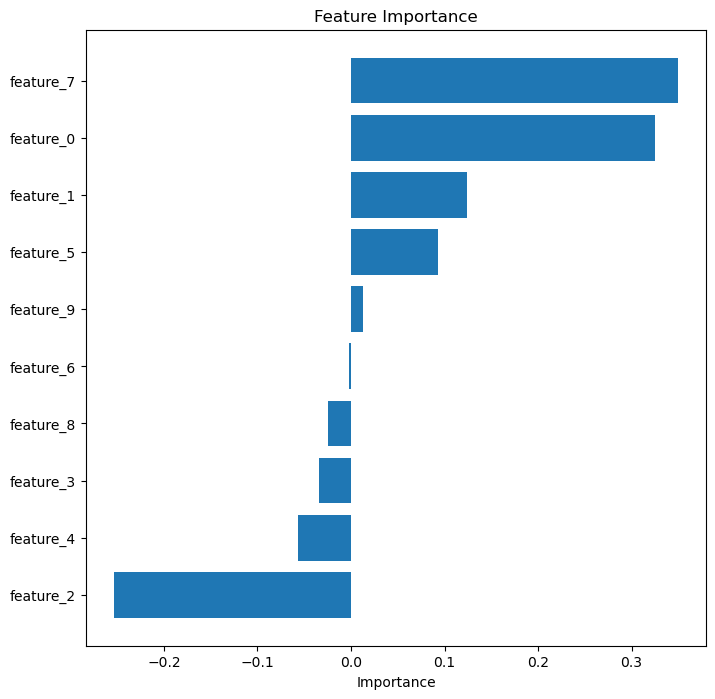

In [2]:
corr_df = feature_importance_spearmanr(data=dfr)
plot_importance(corr_df)

**Conclusion:** We can see that the features 9 and 7 have high positive correlation wrt target, features 1,8 and 2 have low positive correlation whereas features 5,4,0,3 and 6 do not show much correlation with the target variable and hence are very low or almost zero.

<a id="2ab"></a>
#### Classification Problem:

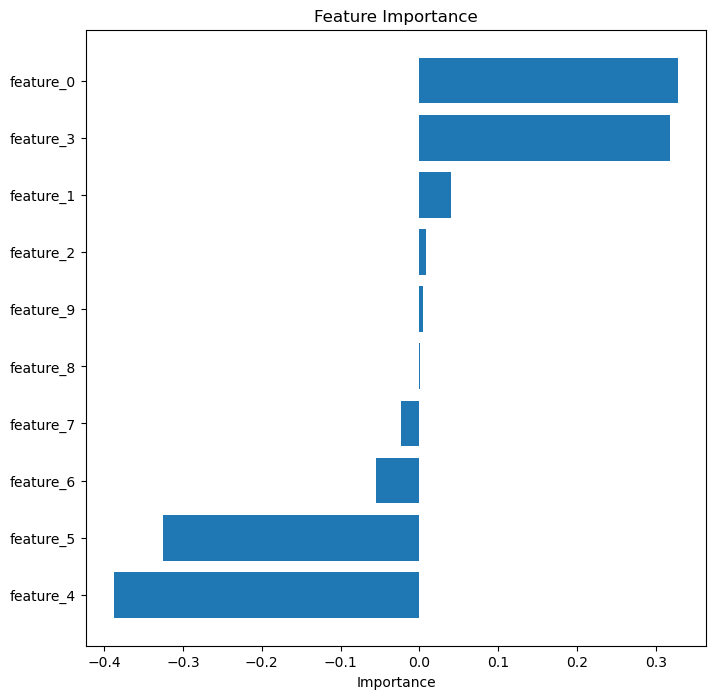

In [3]:
corr_df = feature_importance_spearmanr(data=dfc)
plot_importance(corr_df)

**Conclusion:** We can see that the features 0 and 3 have high positive correlation wrt target, features 5 and 4 have high negative correlation whereas features 1,2,9,8,7 and 6 do not show much correlation with the target variable and hence are very low or almost zero.

<a id="2b"></a>
### 2. Pearson's Correlation:
It is a statistical measure of linear correlation between two variables. It is the ratio between the covariance of two variables and the product of their standard deviations. It is a normalized form of covariance, therefore the coefficient always has a value between −1 and 1. The Pearson's correlation evaluates the linear relationships between variables or features.

$$r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}$$

It is used in feature importance analysis to determine the relationship between features and the target variable based on their importance calculated using correlation coefficient. 

Algorithm:
1. Calculate the correlation coefficient using above formula for each feature with target variable.
2. Sort these coefficients to rank order the features and determine more important features in comparison to others.

Lets take the same regression and classification problem and see how this method determines the importance of features and how is it compared to Spearman's correlation.

<a id="2ba"></a>
#### Regression problem:

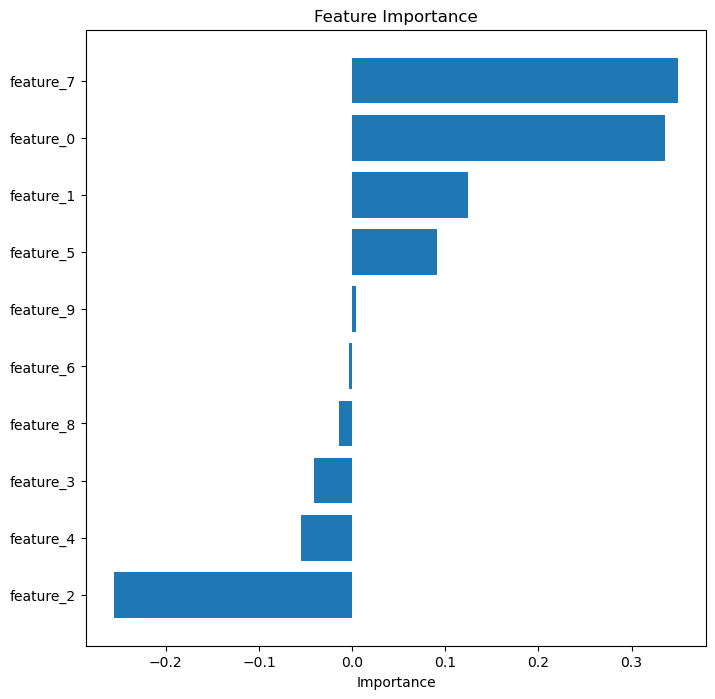

In [4]:
corr_df = feature_importance_pearsonr(data=dfr)
plot_importance(corr_df)

**Conclusion:** We can see the importances are very similar to Spearnman's rank correlation. Here also, the features 9 and 7 have high positive correlation wrt target, features 1,2 and 8 have low positive correlation (a slight variation in the order) whereas features 4,5,0,6 and 3 (a slight variation in the order) do not show much correlation with the target variable and hence are very low or almost zero.

<a id="2bb"></a>
#### Classification Problem:

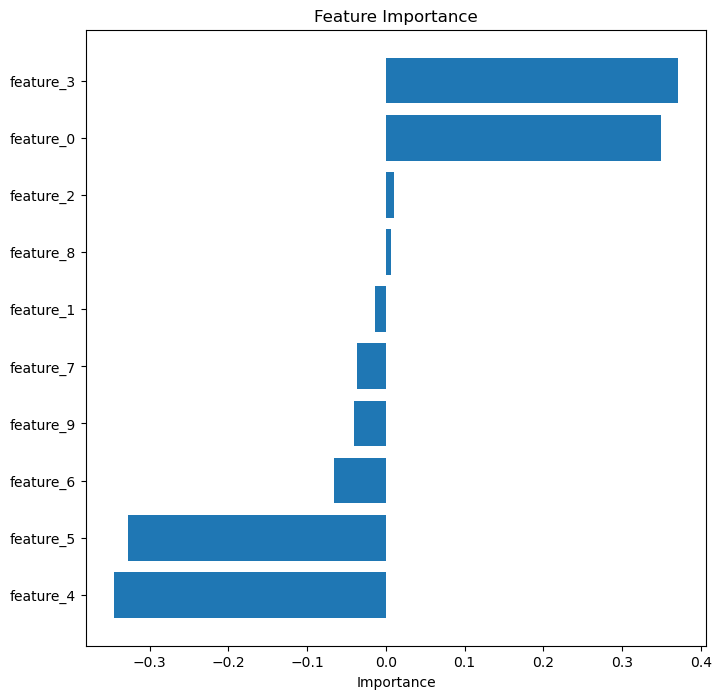

In [5]:
corr_df = feature_importance_pearsonr(data=dfc)
plot_importance(corr_df)

**Conclusion:** The overall correlation ranking is very similar to the Spearman's correlation (with slight changes in values and ranking). We can see that the features 0 and 3 have high positive correlation wrt target, features 5 and 4 have high negative correlation whereas features 1,2,9,8,7 and 6 do not show much correlation with the target variable and hence are very low or almost zero.

<a id="2c"></a>
### 3. Principal component analysis:
Principal component analysis is a technique to analyse dataset with high dimensions or features. This method is generally used in dimensionality reduction of a dataset while retaining as much of the original variation in the data as possible and hence used for feature selection or reduction.<br>
The way PCA works is by identifying the principal components of the data, which are the directions in the feature space that capture the most variance in the data. The first principal component is the direction that captures the most variance, and each subsequent principal component captures the remaining variance in the order of importance. PCA then transforms or projects the data onto these principal component directions, thereby reducing the number of features in the dataset.

PCA is particularly useful when working with high dimensional datasets, where the number of features is much larger than the number of samples. Here, the datasets may suffer from the curse of dimensionality, which can lead to overfitting and poor generalization. PCA mitigates this problem by reducing the dimensionality of the dataset while keeping most of the original variation in the data.

Algorithm:
1. Centered the data at zero by subtracting from mean in each direction or features.
2. Compute the covariance matrix between the different features in the data. It can be computed by multiplying the transpose of the data matrix by the data matrix itself.
3. Compute the eigenvectors and eigenvalues of the covariance matrix (principal components of the data). The eigenvectors are the directions in the feature space that capture the most variance, and the eigenvalues are the amount of variance captured by each eigenvector.
4. Sort the eigenvectors by eigenvalues in descending order based on their corresponding eigenvalues. This way, the first few principal components capture the most variance in the data.
5. Select the number of principal components to retain depends on the amount of variance that needs to be captured. Generally, we choose the number of principal components that capture a certain percentage of the total variance in the data.
6. Project the data onto the principal components to obtain the reduced-dimensional representation of the data.

Drawback:
- Since PCA converts or transforms the data completely, the features as well as the data loses its interpretability and hence is not an easy method to explain.

Lets walk through the same examples of regression and classification and see how many features does PCA think is important.

<a id="2ca"></a>
#### Regression Problem:

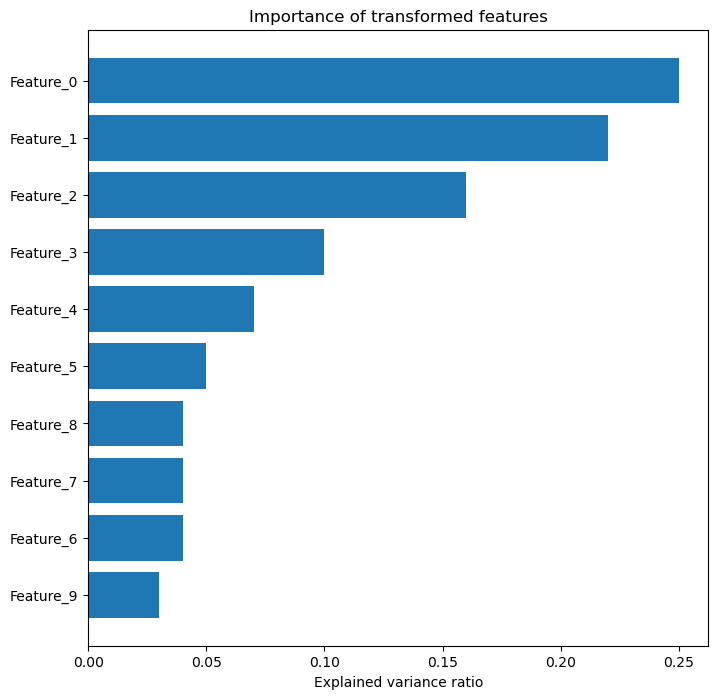

In [6]:
imp_df = perform_pca(dfr)
plot_importance(imp_df, "Importance of transformed features", "Explained variance ratio")

**Conclusion:** Do not get confused with the other methods of calculating feature importances, the PCA transforms the data completely and loses the interpretability of features. Here we can see that the first 4 converted features represent the most variance (atleast 80%) in the data and hence are more important than the others. Therefore, we can keep only those 4 features in the data to fit the model. 

<a id="2cb"></a>
#### Classification Problem:

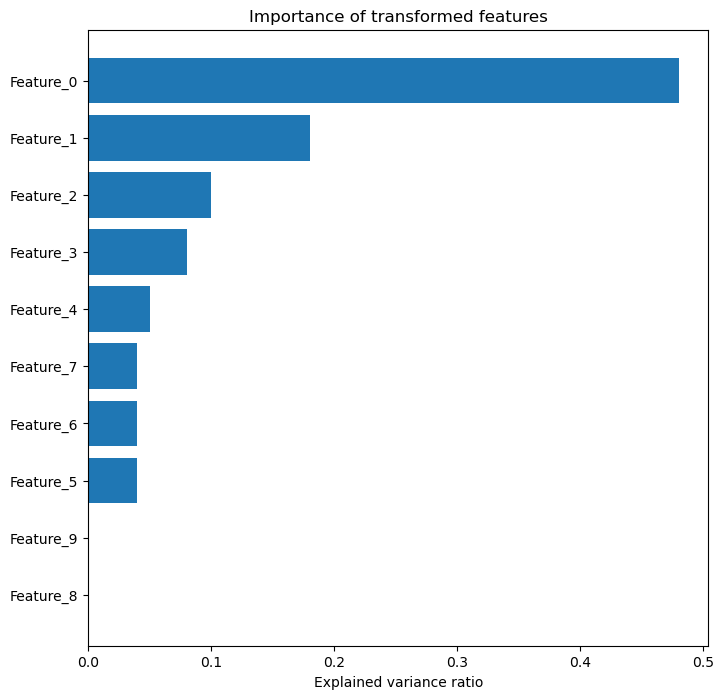

In [7]:
imp_df = perform_pca(dfc)
plot_importance(imp_df, "Importance of transformed features", "Explained variance ratio")

**Conclusion:** Similarly, for classification problem, we can see that majority of variation is captured in the first 3 converted features and therefore, we can keep only those 3 features in the data to fit the model.

<a id="2d"></a>
### 4. Permutation Importance:
Permutation importance is a technique to evaluate importance of features in a machine learning model. It works by permuting the values within each feature and evaluating the resulting decrease in performance of the model. The idea is that if a feature is actually important then permuting its values will significant decrease the model's performance. If there is no significant decrease in the performance then the feature may not be as important.

To calculate permutation importance, the original set is used to predict the target variable. Then for each feature is individually permuted, and is used to predict the target variable again. The decrease in model performance (e.g., decrease in accuracy or increase in error) is calculated as a metric of the feature's importance. The larger the decrease in performance, the more important the feature is considered.

Permutation importance is useful for identifying which features are contributing most to a model's predictions, which can help with feature selection, identifying potential sources of bias, and providing insights into the underlying relationships between the features and the target variable. Permutation importance can be used with linear and tree based modeling methods.

Algorithm:
1. Estimate the error of the model on your original training or validation data (e.g. log loss, accuracy, mse, etc.). Call this s
2. For each feature j:
    - Permute the data for feature j
    - Use the new data with permuted feature to get predictions
    - Calculate the error of the model
    - repeat K times
3. Calculate feature importance for each feature j as 
$$ I_j = s - \frac{1}{K} \sum_{k=1}^{K} s_{k,j}$$

Lets try it out on the linear model on both datasets.

<a id="2da"></a>
#### Regression Problem (Linear Model):

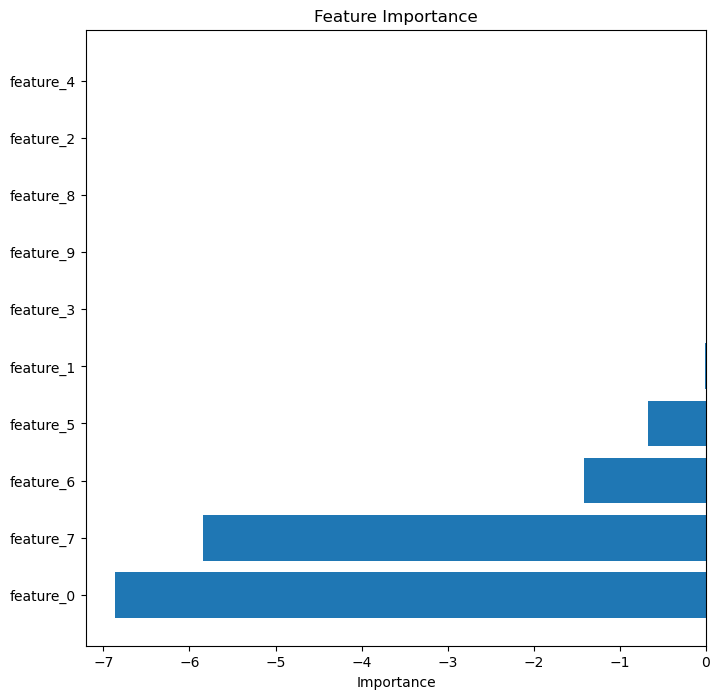

In [8]:
imp_df = permutation_importance(dfr, "LinearRegression", "MSE")
plot_importance(imp_df)

**Conclusion:** The relative feature importance using this method is somewhat similar to the one calculated using previous methods. Feature 0 and 7 seem to be most important features.

<a id="2db"></a>
#### Classification Problem (Linear Model):

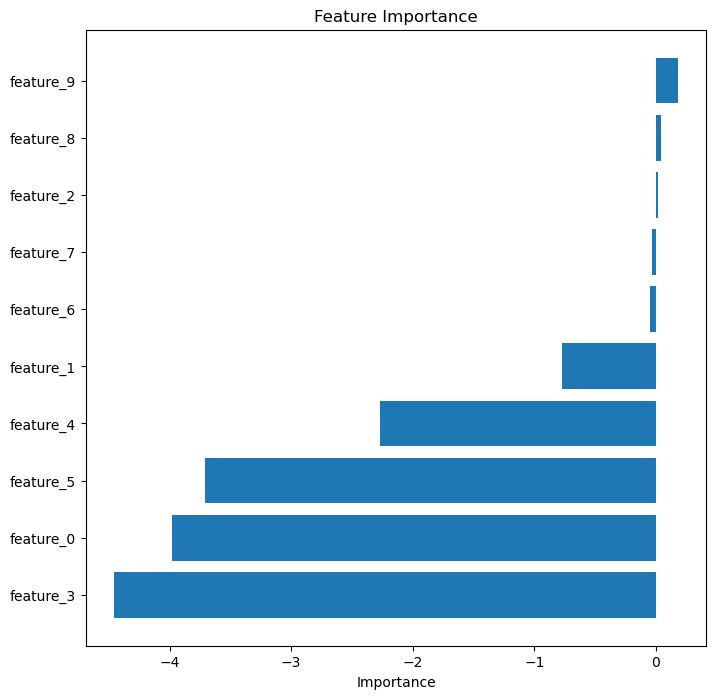

In [9]:
imp_df = permutation_importance(dfc, "LogisticRegression", "logloss")
plot_importance(imp_df)

**Conclusion:** The relative feature importance using this method is somewhat similar to the one calculated using previous methods. Feature 4,5,0 and 3 seem to be most important features.

<a id="2dc"></a>
#### Regression Problem (Tree based model):

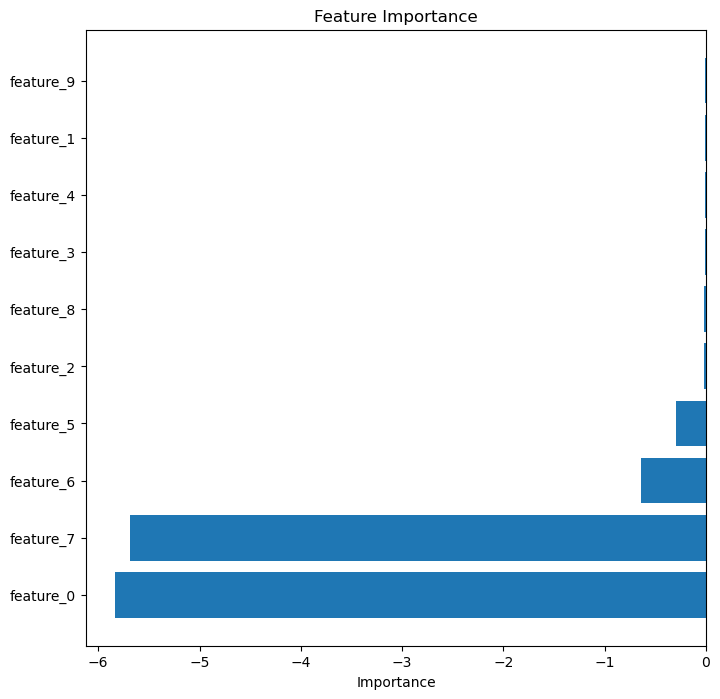

In [10]:
imp_df = permutation_importance(dfr, "RandomForestRegressor", "MSE")
plot_importance(imp_df)

**Conclusion:** The relative feature importance using this method is somewhat similar to the one calculated using previous methods. Feature 0 and 7 seem to be most important features.

<a id="2dd"></a>
#### Classification Problem (Tree based model):

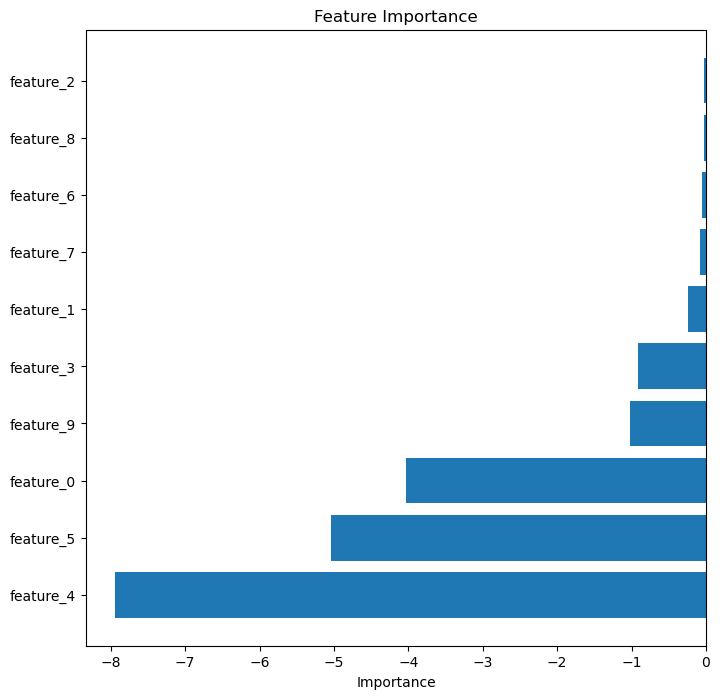

In [11]:
imp_df = permutation_importance(dfc, "RandomForestClassifier", "logloss")
plot_importance(imp_df)

**Conclusion:** The relative feature importance using this method is somewhat similar to the one calculated using previous methods. Feature 4,5,0 and 3 seem to be most important features.

<a id="3"></a>
<font size=6><p style="text-align: center;">Model Specific Methods</p></font>

<a id="3a"></a>
### 1. Linear Models
With linear regression we get weights/coefficients for each feature, and a bias term. These coefficients alone do not indicate importance, but we can use the p-value (or the absolute value of the test statistic) as a measure of “significance” (defined below). The p-value is computed based on the test statistic:
$$t_{\beta{_j}} = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}$$

The magnitude of the test statistic (sometimes called the effect size) can be meaningful on its own, telling us which of the features are influencing the fit of the model the most, but this doesn't mean these features are most important or most predictive. Predictive power is only really measured when using a validation set. A small p-value tells if the coefficient is significantly different than zero, but a large p-value doesn’t tell us the opposite, a large p-value only tells us if there is not enough evidence (usually meaning not enough data) to conclude with certainty that the coefficient is different than zero. Because of the way p-values are interpreted, and all of the assumptions that go into linear regression in the first place, it is not appropriate to use p-values as a guide to indicate how important a feature is for predicting, or to rank order features. Therefore, these are only used to draw inferences and understand the data. The feature’s contribution to the model by correctly interpreting the coefficient. 

The value of the coefficient is the average increase/decrease in the target variable for every one unit increase/decrease in the feature. Only if the features have all been normalized in some way so that they are on the same scale, such as regularized linear models. This way we can assess feature importance based on the size (absolute value) of the coefficients, but unfortunately the interpretability is lost.

<a id="3b"></a>
### 2. Tree Based Models
In this methos, the feature importance for decision trees and random forests is assessed using the gini importance, or the mean decrease impurity importance. The way it works is that the gini index is calculated, for each feature fi, we measure the decrease in the gini at each decision node that is split on fi by subtracting the weighted average of the gini in the two child nodes from the gini index in the parent decision node. We do this across all nodes for fi and take the average.

The problem with using this method is that it is biased towards continuous features with a lot of unique values, because these are the features that are more likely to be chosen when a decision tree is fit (because there are more values to choose for splitting, it is more likely to find a good split point).

In [12]:
def feature_importance_model(df, model='LinearRegression'):
    X = df.drop(columns=['target'])
    y = df['target']
    if model == "RandomForestRegressor":
        model = RandomForestRegressor()
        model.fit(X,y)
        importance = model.feature_importances_
    elif model == "RandomForestClassifier":
        model = RandomForestClassifier()
        model.fit(X,y)
        importance = model.feature_importances_
    
    imp_df = pd.DataFrame({"column": X.columns, "importance": importance})    
    return imp_df

<a id="3ba"></a>
#### Regression Problem:

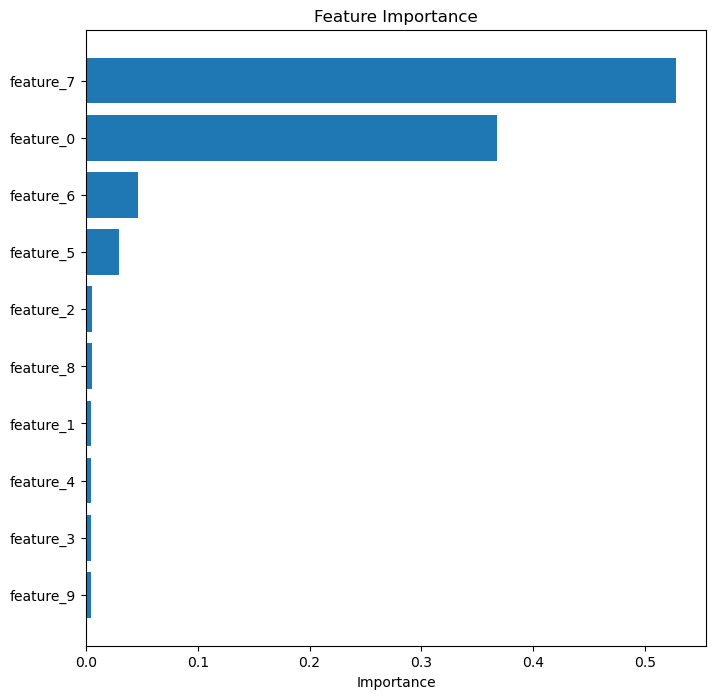

In [13]:
imp_df = feature_importance_model(dfr, "RandomForestRegressor")
plot_importance(imp_df)

**Conclusion:** The relative feature importance using this method is aligns with the one calculated using previous methods. Feature 7 and 0 seem to be the most important features.

<a id="3bb"></a>
#### Classification Problem:

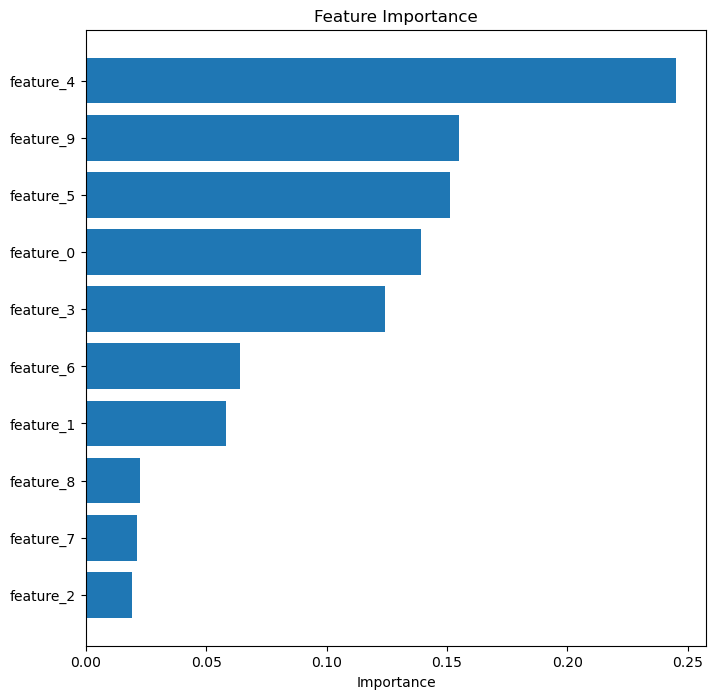

In [14]:
imp_df = feature_importance_model(dfc, "RandomForestClassifier")
plot_importance(imp_df)

**Conclusion:** The relative feature importance using this method aligns with the one calculated using previous methods. Feature 4,5,9,0 and 3 seem to be the most important features.


<a id="3c"></a>
### 3. Importance by Shapely Value
Shapley value is a method for assigning a contribution value to each feature in a prediction model. The Shapley value approach uses a cooperative game framework to consider each feature as a player in a game. Each player (feature) contributes to the outcome (prediction) in a unique way, and the Shapley value measures the average contribution of each player across all possible coalitions of players.

In the context of machine learning, the Shapley value for a feature represents the marginal contribution of that feature to the prediction of a specific instance, taking into account all possible combinations of features. Shapley values have become popular for feature importance and model interpretation in machine learning, as they provide a principled approach to understanding the impact of individual features on model predictions. The Shapley values can be used to produce a feature ranking or to identify the most important features for a given prediction. Additionally, Shapley values can be used to identify feature interactions and assess model fairness.

The Shapley value, $\varphi_m (v)$, is the fair share or payout to be given to each team member $m$. The $\varphi_m (v)$ is defined as

$$\varphi_m(v) = \frac{1}{p!} \sum_{S \subseteq T\backslash{m}} {|S|!(|T|-|S|-1)!}^{-1} [v(S\cup{m}) - v(S)]$$

For a given member, $m$, the summation is over all the subsets $S$, of the team, $T={1,2,3,\ldots,p}$, that one can construct after excluding $m$. In the above formula, $k(S)$ is the size of $S$, $v(S)$ is the value achieved by subteam $S$, and $v(S\cup{m})$ is the realized value after $m$ joins $S$.

We define a fair allocation to be an allocation that satisfies:

Efficiency: The total of individual contributions is equal to the team’s realized value:
$$\sum_{m=1}^p \varphi_m(v) = v(T)$$

Symmetry: Two team members with the same added value have the same share:
If $v(S\cup{m})=v(S\cup{n})$, then $\varphi_m(v) = \varphi_n(v)$.

Linearity: If the team participates in several projects (say two projects), each yielding $v(T)$, $u(T)$, then adding the share of each member in the different projects is the same as finding his/her share using the total gain $v(T)+u(T)$. In other words, the shares are additive:
$$\varphi_m(v + u) = \varphi_m(v) + \varphi_m(u)$$

And, $\varphi_m(av) = a \varphi_m(v)$.

Shapley values have found applications in several fields. They can be applied in machine learning to explain feature contributions where features are the players or team members and the model prediction is the payout of the game or teamwork.

To calculate the importance of feature $j$, we can intuitively think of the process as, for each iteration, drawing feature values in random order for all features except for feature $j$ before we then calculate the difference of prediction with and without feature $j$. The Shapley value is computed by taking the average of difference from all combinations. Essentially, the Shapley value is the average marginal contribution of a feature considering all possible combinations.

The main advantage of Shapley value is that it provides a fair contribution of features with mathematically proven theory and properties about its mechanism. However, its downside is complexity of the algorithm because the combination of features grows exponentially. Therefore, in a practical scenario, the Shapley value can only be estimated using a subset of combinations.







<a id="3ca"></a>
#### Regression Problem:

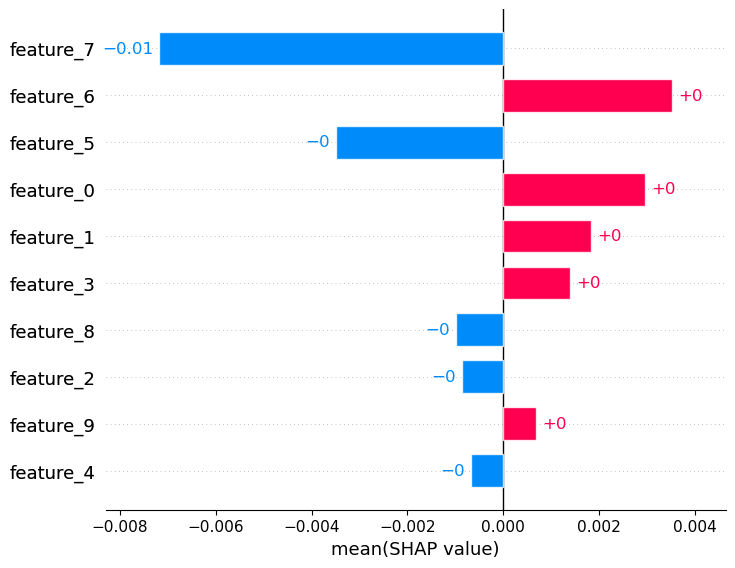

In [15]:
shap_importance(dfr)

**Conclusion:** The shapely value based feature importance aligns with the one calculated using previous methods. Feature 7,6,5, and 0 seem to be the most important features.

<a id="3cb"></a>
#### Classification Problem:

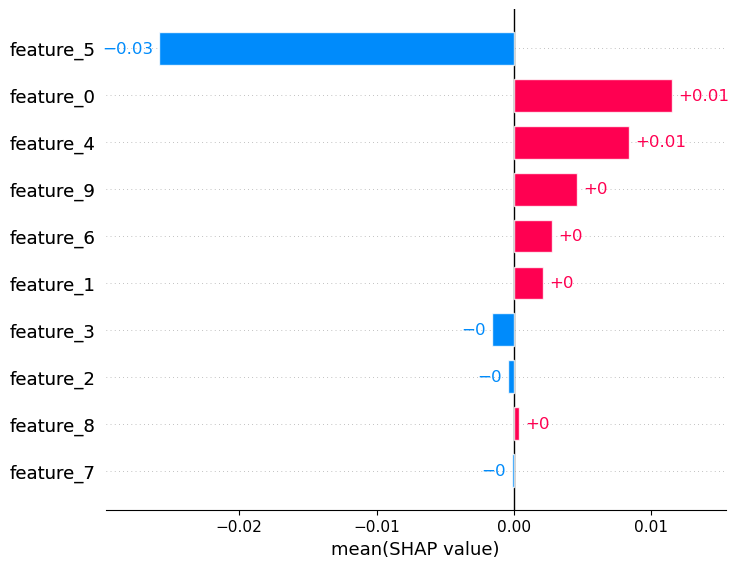

In [16]:
shap_importance(dfc)

**Conclusion:** The shapley value based feature importance aligns with the one calculated using previous methods. Feature 5,0 and 4 seem to be the most important features.


<a id="4"></a>
<font size=6><p style="text-align: center;">Comparison of feature selection techniques</p></font>

We will be using diabetes data to see how diffferent feature importances perform when applied to a modeling problem. This one is specific to regression problem and uses mean absolute error (MAE) as a loss and performance measure. We will comparing all the feature importance techniques we have talked about and see how do they perform in relation to each other.

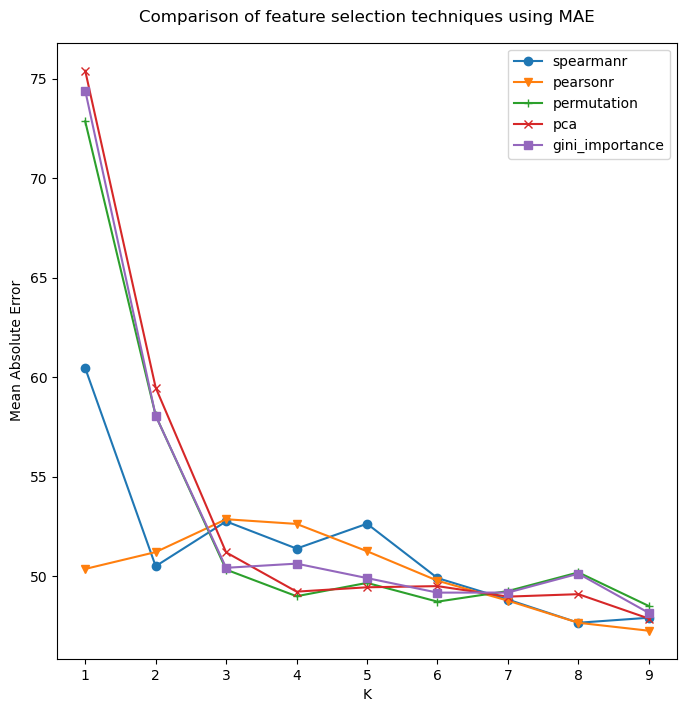

In [18]:
## Load Diabetes data
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
dict_data = feature_importance_all(df)
plot_all(dict_data)

<a id="5"></a>
<font size=6><p style="text-align: center;">Summary</p></font>

All the methods discussed use different approach to calculate the feature importance and find out the most important features in relation to the others. These methods give somewhat similar results but a little difference in ordering of importance. The one thing that is common in all the methods is that they try to push the least important features to the lowest values or bottom of the plot, this makes it easy for us to identify such features that do not weigh enough in our prediction and build a more stable and accurate model by dropping them. 

<a id="6"></a>
<font size=6><p style="text-align: center;">References</p></font>
https://github.com/parrt/msds689/blob/master/projects/featimp/featimp.md<br>
https://usfca.instructure.com/courses/1608515/files/70210699?module_item_id=17873191<br>
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient<br>
https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient<br>
https://www.baeldung.com/cs/ml-feature-importance<br>
https://en.wikipedia.org/wiki/Principal_component_analysis<br>
https://scikit-learn.org/stable/modules/permutation_importance.html<br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/<br>
https://c3.ai/glossary/data-science/shapley-values/<br>